<a href="https://colab.research.google.com/github/mdonbruce/AspNetDocs/blob/master/Module3_Data_Foundations_MiniLabs_EXECUTED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Module 3 Mini-Labs — Data Foundations
### Missing Values • Outliers • Visualization (Google Colab)

**Instructions:** Run each code cell, then read the explanation cell that follows.

**Dataset:** `module3_data_foundations_large.csv` (50,000 rows)


## 0) Setup + Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('module3_data_foundations_large.csv', parse_dates=['timestamp'])
print('Shape:', df.shape)
df.head()

Shape: (50000, 16)


,order_id,timestamp,customer_id,state,channel,category,quantity,unit_price,discount_rate,shipping_days,shipping_fee,tax,net_revenue,returned,support_tickets,satisfaction
0,1,2025-10-09 08:46:00,102812,AZ,Store,Sports,4,80.31,0.0511,2.68,2.81,21.34,328.97,0,0,NaN
1,2,2025-12-09 23:44:00,128627,NC,Web,Sports,3,48.06,0.0528,5.93,8.23,9.56,154.37,0,0,2.83
2,3,2025-11-29 05:52:00,115708,WA,Mobile,Fashion,5,46.85,0.1387,4.20,5.39,14.12,28.94,1,0,3.35
3,4,2025-11-09 19:58:00,129713,IL,Web,Home,2,37.50,0.1860,6.31,7.23,4.27,72.55,0,0,3.82
4,5,2025-11-09 07:18:00,112454,NC,Mobile,Grocery,3,30.62,0.0449,3.35,3.76,6.14,97.64,0,0,NaN


✅ Loaded the dataset.

**Quick-check:** Which columns are numeric? Which are categorical?

## Mini-Lab 1 — Missing Values
### Step 1: Missingness table

In [2]:
missing_pct = (df.isna().mean()*100).sort_values(ascending=False).round(2)
pd.DataFrame({'missing_%': missing_pct}).head(12)

,missing_%
satisfaction,7.77
shipping_days,6.01
discount_rate,0.61
order_id,0.00
channel,0.00
timestamp,0.00
customer_id,0.00
state,0.00
unit_price,0.00
quantity,0.00


✅ Identify the top missing columns and discuss why values might be missing.

### Step 2: Imputation (median + group-median)

In [3]:
df_clean = df.copy()
for col in ['shipping_days','satisfaction']:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

df_clean['discount_rate'] = df_clean['discount_rate'].fillna(
    df_clean.groupby('channel')['discount_rate'].transform('median')
)

df_clean[['shipping_days','satisfaction','discount_rate']].isna().mean()

,0
shipping_days,0.0
satisfaction,0.0
discount_rate,0.0


✅ Verify missingness is resolved for the imputed columns.

**Quick-check:** Why median instead of mean?

## Mini-Lab 2 — Outliers
### Step 1: Detect net_revenue outliers with IQR

In [4]:
x = df_clean['net_revenue'].values
q1, q3 = np.percentile(x, [25, 75])
iqr = q3 - q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr
outlier_mask = (df_clean['net_revenue'] < lower) | (df_clean['net_revenue'] > upper)
print(f'IQR bounds: [{lower:.2f}, {upper:.2f}]')
print(f'Outlier rate: {outlier_mask.mean()*100:.2f}%')

IQR bounds: [-226.06, 528.27]
Outlier rate: 8.98%


✅ Outlier detection complete.

**Quick-check:** Would you remove, cap, or flag outliers in a business setting?

### Step 2: Flag + cap (winsorize) and compare stats

In [5]:
df_flagged = df_clean.copy()
df_flagged['net_revenue_outlier'] = outlier_mask.astype(int)
df_flagged['net_revenue_capped'] = df_flagged['net_revenue'].clip(lower, upper)

summary = pd.DataFrame({
  'stat':['mean','median','std'],
  'original':[df_flagged['net_revenue'].mean(), df_flagged['net_revenue'].median(), df_flagged['net_revenue'].std()],
  'capped':[df_flagged['net_revenue_capped'].mean(), df_flagged['net_revenue_capped'].median(), df_flagged['net_revenue_capped'].std()],
})
summary

,stat,original,capped
0,mean,205.994161,176.702020
1,median,123.325000,123.325000
2,std,302.895969,156.753201


✅ Compare how outliers change mean vs median.

## Mini-Lab 3 — Visualization
### Plot 1: Distribution (original vs capped)

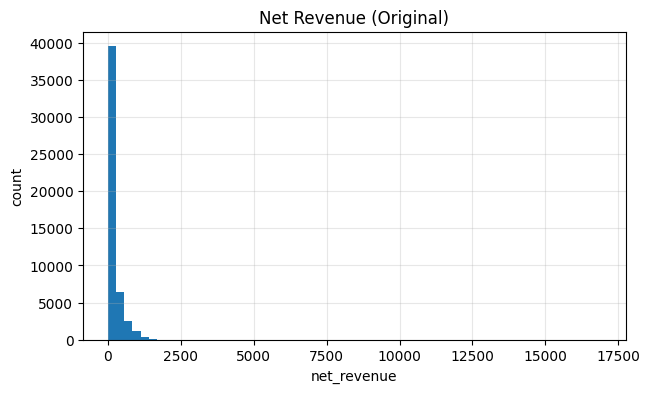

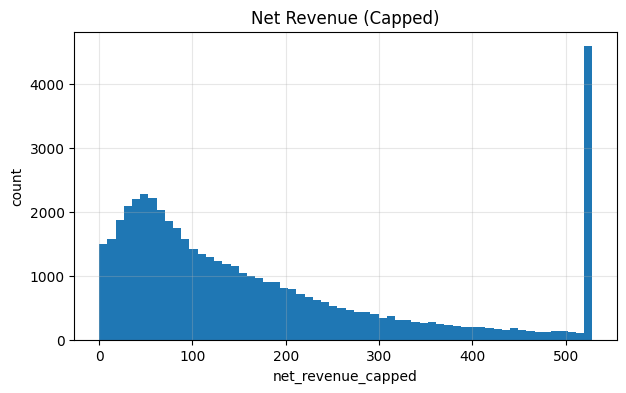

In [6]:
plt.figure(figsize=(7,4))
plt.hist(df_flagged['net_revenue'], bins=60)
plt.title('Net Revenue (Original)')
plt.xlabel('net_revenue')
plt.ylabel('count')
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(7,4))
plt.hist(df_flagged['net_revenue_capped'], bins=60)
plt.title('Net Revenue (Capped)')
plt.xlabel('net_revenue_capped')
plt.ylabel('count')
plt.grid(True, alpha=0.3)
plt.show()

✅ How does capping change interpretability of the distribution?

### Plot 2: Shipping speed vs satisfaction (sample)

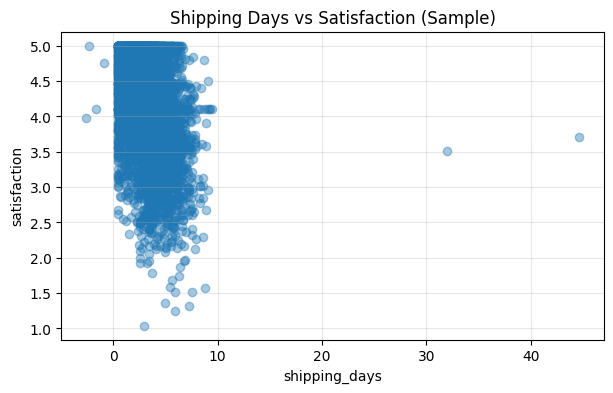

In [7]:
sample = df_clean.sample(4000, random_state=7)
plt.figure(figsize=(7,4))
plt.scatter(sample['shipping_days'], sample['satisfaction'], alpha=0.4)
plt.title('Shipping Days vs Satisfaction (Sample)')
plt.xlabel('shipping_days')
plt.ylabel('satisfaction')
plt.grid(True, alpha=0.3)
plt.show()

✅ Describe the pattern: strong/weak/mixed? What might explain it?

## Lab Reflection (Include in write-up)
1. What key insights were revealed through your evaluation?
2. Which imputation method was most defensible, and why?
3. How did outliers affect averages vs medians?
4. What did visuals reveal that tables did not?
5. How could these issues mislead an ML model?


## Submission Requirements
- 1–2 page APA-formatted paper (Word/PDF)
- Include screenshots of key outputs and your plots
- Provide short interpretations + citations if used
- Due: Sunday, 11:59 PM
